    SVM usable both for classification and regression. 
    Linear and nonlinear(?!) kernels available to use with SVMs
        LSVM (linear SVM) linear classifier with maximum margin. Linear models make strong assumptions about the structure of the data.
        Kernelized SVMs: take the original input data space and transform it to a new higher dimensional feature space, where it becomes much easier to classify the transform to data using a linear classifier.
    
    different choices of kernel correspond to different types of transformations to that higher dimensional feature space.
    
    Classifier margin = maximum width the decision boundary area can be increased before hitting  a datapoint: reward classifiers for the amount of separation that can provide between the two classes. 
    SVMs form combinations of kernels centered at some of the training samples
    
    !!!! MUST HAVE: scaling / feature normalization. SVMs are NOT decision trees :). Important to normalize the input data, so that all the features have comparable units that are on the same scale. 
    
    
    
    PARAMETERS
        kernel, default "rbf", "polynomial"
        gamma: RBF kernel width, controls how far the influence of a single trending example reaches
            Small gamma ==> larger similarity radius. So that points farther apart are considered similar ==> broader, smoother decision regions. 
            Larger gamma ==>  the kernel value to K decays more quickly and points have to be very close to be considered similar ==>  smaller, more complex decision regions.
        C regularization parameter
        Typicaly gamma and C are tuned at the same time

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from sklearn.datasets import load_iris
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from matplotlib.colors import ListedColormap

#from adspy_shared_utilities import plot_feature_importances
#from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_class_regions_for_classifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
#from adspy_shared_utilities import plot_fruit_knn


    FRUIT DATASET


In [2]:
# fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
print (pd.DataFrame(fruits).info())

#feature_names_fruits = ['mass', 'width', 'height']
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
print (lookup_fruit_name)


X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']

print (X_fruits.head())
print(y_fruits.head())

target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']


X_fruits_3d = fruits[['height', 'width', 'mass']]
y_fruits_3d = fruits['fruit_label']


# default is 75% / 25% train-test split
X_train_fruit, X_test_fruit, y_train_fruit, y_test_fruit = train_test_split(X_fruits, y_fruits, random_state=0)
#X_train_fruit, X_test_fruit, y_train_fruit, y_test_fruit = train_test_split(X_fruits.values,y_fruits.values, random_state = 0)
X_train_fruit2D, X_test_fruit2D, y_train_fruit2D, y_test_fruit2D = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)
X_train_fruit3D, X_test_fruit3D, y_train_fruit3D, y_test_fruit3D = train_test_split(X_fruits_3d, y_fruits_3d, random_state = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB
None
{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}
   height  width  mass  color_score
0     7.3    8.4   192         0.55
1     6.8    8.0   180         0.59
2     7.2    7.4   176         0.60
3     4.7    6.2    86         0.80
4     4.6    6.0    84         0.79
0    1
1    1
2    1
3    2
4    2
Name: fruit_label, dtype: int64


In [3]:
# all 4 columns used to generate train test datasets 
scaler_fruit = MinMaxScaler()
X_train_scaled_fruit = pd.DataFrame(scaler_fruit.fit_transform(X_train_fruit))
X_train_scaled_fruit.columns = scaler_fruit.get_feature_names_out()
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled_fruit = pd.DataFrame(scaler_fruit.transform(X_test_fruit))
X_test_scaled_fruit.columns = scaler_fruit.get_feature_names_out()

# 2 columns used to generate train test datasets
scaler_fruit_2D = MinMaxScaler()
X_train_scaled_fruit2D = pd.DataFrame(scaler_fruit_2D.fit_transform(X_train_fruit2D))
X_train_scaled_fruit2D.columns = scaler_fruit_2D.get_feature_names_out()
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled_fruit2D = pd.DataFrame(scaler_fruit_2D.transform(X_test_fruit2D))
X_test_scaled_fruit2D.columns = scaler_fruit_2D.get_feature_names_out()


# 2 columns used to generate train test datasets
scaler_fruit_3D = MinMaxScaler()
X_train_scaled_fruit3D = pd.DataFrame(scaler_fruit_3D.fit_transform(X_train_fruit3D))
X_train_scaled_fruit3D.columns = scaler_fruit_3D.get_feature_names_out()
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled_fruit3D = pd.DataFrame(scaler_fruit_3D.transform(X_test_fruit3D))
X_test_scaled_fruit3D.columns = scaler_fruit_3D.get_feature_names_out()

In [4]:
iris = load_iris()
print(pd.DataFrame(iris.data).info())
print (iris.keys())

print (pd.DataFrame(iris.data).head())
print (pd.DataFrame(iris.target).head())


X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris.data, 
                                                                        iris.target, 
                                                                        random_state = 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
   0
0  0
1  0
2  0
3  0
4  0


In [5]:
iris_2d = pd.DataFrame(iris.data).loc[:,0:1]
X_train_iris_2D, X_test_iris_2D, y_train_iris_2D, y_test_iris_2D = train_test_split(iris_2d, 
                                                                                    iris.target, 
                                                                                    random_state = 3)

iris_3d = pd.DataFrame(iris.data).loc[:,0:2]
X_train_iris_3D, X_test_iris_3D, y_train_iris_3D, y_test_iris_3D = train_test_split(iris_3d, 
                                                                                    iris.target, 
                                                                                    random_state = 3)
# no further scaling is needed , ranges are similar

In [6]:
scaler_iris = MinMaxScaler()
X_train_scaled_iris = pd.DataFrame(scaler_iris.fit_transform(X_train_iris))
X_train_scaled_iris.columns = scaler_iris.get_feature_names_out()
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled_iris = pd.DataFrame(scaler_iris.transform(X_test_iris))
X_test_scaled_iris.columns = scaler_iris.get_feature_names_out()

# SVM MULTICLASS CLASSIFICATION

# FRUIT DATASET: 2, 3 , 4 input features to train the model
    fails to converge with 4D ==> GATHERING MORE FEATURES CAN HURT!!! 
    poorer train-test accuracy with 3d than with 2D
    
    Curse of dimensionality: the similarity based reasoning that ML algorithms depend on breaks down in high dimensions (e.g. KNN Hamming distance , 100 input features, 98 which are irrelevant BUT introduce noise that completely swamps the signal in the two relevant input features, effectively causing KNN tomake random predictions)
            most of the volume of a high dimensional orange is in the skin not the pulp. and if we approximate a hypersphere by inscribing it in a hypercube, in high dimensions most of the volume of the hypercube is outside the hypersphere
            
            naively one might think that gathering more features never hurts since at worst they provide no new info about the class. But in fact their benefits may be outweighted by the curse of dimensionality. 

    FRUIT DATASET 2D (width height columns, no ?! feature scaling)

In [7]:
X_train_fruit2D.head()

,height,width
42,7.2,7.2
48,10.1,7.3
7,4.0,5.8
14,7.3,7.6
32,7.0,7.2


In [8]:
this_gamma = 1
this_C = 1
clf = SVC(kernel = 'rbf', 
          gamma = this_gamma,
          C = this_C).fit(X_train_fruit2D, y_train_fruit2D)

print (clf.get_params(deep = True))

print('SVM, Fruit dataset 2 dimensions, no feature normalization')
print('Accuracy of SVMClassifier on training set: {:.2f}'
     .format(clf.score(X_train_fruit2D, y_train_fruit2D)))
print('Accuracy of SVMClassifier  on test set: {:.2f}'
     .format(clf.score(X_test_fruit2D, y_test_fruit2D)))

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
SVM, Fruit dataset 2 dimensions, no feature normalization
Accuracy of SVMClassifier on training set: 0.82
Accuracy of SVMClassifier  on test set: 0.67


    PREDICTION EXAMPLE / SVM ON FRUIT DATASET 2D


In [9]:
#example_fruit = pd.DataFrame([[5.5, 2.2, 10, 0.70]])
example_fruit = pd.DataFrame([[5.5, 2.2]]) # height and witdh used for prediction
example_fruit.columns = feature_names_fruits[0:2]
example_fruit_scaled = pd.DataFrame(scaler_fruit_2D.transform(example_fruit))
example_fruit_scaled.columns = scaler_fruit_2D.get_feature_names_out()
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[clf.predict(example_fruit_scaled)[0]-1])

Predicted fruit type for     height  width
0     5.5    2.2  is  lemon


In [10]:
print ("PREDICTIONS")
predictions = clf.predict(X_test_fruit2D)
unique, counts = np.unique(predictions, return_counts=True)
print (pd.DataFrame(counts, unique))


print ("")
print ("TEST SET TARGET")
unique, counts = np.unique(y_test_fruit, return_counts=True)
print (pd.DataFrame(counts, unique))

PREDICTIONS
   0
1  5
2  1
3  7
4  2

TEST SET TARGET
   0
1  4
2  1
3  8
4  2


    FRUIT DATASET 3D

In [11]:
this_gamma = 1
this_C = 1
clf = SVC(kernel = 'rbf', 
          gamma = this_gamma,
          C = this_C).fit(X_train_fruit3D, y_train_fruit3D)

print (clf.get_params(deep = True))

print('SVM, Fruit dataset 3 dimensions, no feature normalization')
print('Accuracy of SVMClassifier on training set: {:.2f}'
     .format(clf.score(X_train_fruit3D, y_train_fruit3D)))
print('Accuracy of SVMClassifier  on test set: {:.2f}'
     .format(clf.score(X_test_fruit3D, y_test_fruit3D)))

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
SVM, Fruit dataset 3 dimensions, no feature normalization
Accuracy of SVMClassifier on training set: 0.95
Accuracy of SVMClassifier  on test set: 0.40


    PREDICTION EXAMPLE: FRUIT DATASET 3D (3 input features for training the model)

In [12]:
print ("target_names_fruits ", target_names_fruits)
#example_fruit = pd.DataFrame([[5.5, 2.2, 10, 0.70]])
example_fruit = pd.DataFrame([[5.5, 2.2, 10]]) # height witdh mass used for prediction
example_fruit.columns = feature_names_fruits[0:3]
example_fruit_scaled = pd.DataFrame(scaler_fruit_3D.transform(example_fruit))
example_fruit_scaled.columns = scaler_fruit_3D.get_feature_names_out()

prediction = clf.predict(example_fruit_scaled)
print ("prediction: ", prediction)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[clf.predict(example_fruit_scaled)[0]-1])

target_names_fruits  ['apple', 'mandarin', 'orange', 'lemon']
prediction:  [1]
Predicted fruit type for     height  width  mass
0     5.5    2.2    10  is  apple


In [13]:
print ("PREDICTIONS")
predictions = clf.predict(X_test_fruit3D)

unique, counts = np.unique(predictions, return_counts=True)
print (pd.DataFrame(counts, unique))


print ("")
print ("TEST SET TARGET")
unique, counts = np.unique(y_test_fruit, return_counts=True)
print (pd.DataFrame(counts, unique))

PREDICTIONS
    0
1  13
3   2

TEST SET TARGET
   0
1  4
2  1
3  8
4  2


In [14]:
this_gamma = 1
this_C = 1
clf = SVC(kernel = 'rbf', 
          gamma = this_gamma,
          C = this_C).fit(X_train_fruit, y_train_fruit)

print (clf.get_params(deep = True))

print('SVM, Fruit dataset 3 dimensions, no feature normalization')
print('Accuracy of SVMClassifier on training set: {:.2f}'
     .format(clf.score(X_train_fruit, y_train_fruit)))
print('Accuracy of SVMClassifier  on test set: {:.2f}'
     .format(clf.score(X_test_fruit, y_test_fruit)))

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
SVM, Fruit dataset 3 dimensions, no feature normalization
Accuracy of SVMClassifier on training set: 0.95
Accuracy of SVMClassifier  on test set: 0.40


# IRIS DATASET: 2 , 3 , 4 input features to train the model

In [15]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


    IRIS 2D: two input features to train the model

In [16]:
this_gamma = 1
this_C = 1
clf = SVC(kernel = 'rbf', 
          gamma = this_gamma,
          C = this_C).fit(X_train_iris_2D, y_train_iris_2D)

print (clf.get_params(deep = True))

print('SVM, Iris dataset 2 dimensions, no feature normalization')
print('Accuracy of SVMClassifier on training set: {:.2f}'
     .format(clf.score(X_train_iris_2D, y_train_iris_2D)))
print('Accuracy of SVMClassifier  on test set: {:.2f}'
     .format(clf.score(X_test_iris_2D, y_test_iris_2D)))


print ("------------------------------------------")
print ("PREDICTIONS")
predictions = clf.predict(X_test_iris_2D)

unique, counts = np.unique(predictions, return_counts=True)
print (pd.DataFrame(counts, unique))


print ("")
print ("TEST SET TARGET")
unique, counts = np.unique(y_test_iris_2D, return_counts=True)
print (pd.DataFrame(counts, unique))

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
SVM, Iris dataset 2 dimensions, no feature normalization
Accuracy of SVMClassifier on training set: 0.84
Accuracy of SVMClassifier  on test set: 0.76
------------------------------------------
PREDICTIONS
    0
0  14
1   9
2  15

TEST SET TARGET
    0
0  15
1  12
2  11


      SVM good accuracy, poor visualization ==> probably was trained for more input features than visible 

    IRIS 3D: 3 input features to train the model

In [17]:
this_gamma = 1
this_C = 1
clf = SVC(kernel = 'rbf', 
          gamma = this_gamma,
          C = this_C).fit(X_train_iris_3D, y_train_iris_3D)

print (clf.get_params(deep = True))

print('SVM, Iris dataset 3 dimensions, no feature normalization')
print('Accuracy of SVMClassifier on training set: {:.2f}'
     .format(clf.score(X_train_iris_3D, y_train_iris_3D)))
print('Accuracy of SVMClassifier  on test set: {:.2f}'
     .format(clf.score(X_test_iris_3D, y_test_iris_3D)))

print ("------------------------------------------")
print ("PREDICTIONS")
predictions = clf.predict(X_test_iris_3D)
unique, counts = np.unique(predictions, return_counts=True)
print (pd.DataFrame(counts, unique))
print ("")
print ("TEST SET TARGET")
unique, counts = np.unique(y_test_iris_3D, return_counts=True)
print (pd.DataFrame(counts, unique))

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
SVM, Iris dataset 3 dimensions, no feature normalization
Accuracy of SVMClassifier on training set: 0.97
Accuracy of SVMClassifier  on test set: 0.92
------------------------------------------
PREDICTIONS
    0
0  15
1  11
2  12

TEST SET TARGET
    0
0  15
1  12
2  11


    IRIS ALL 4 input features to train the model

In [18]:
# scaled
this_gamma = 1
this_C = 1
clf = SVC(kernel = 'rbf', 
          gamma = this_gamma,
          C = this_C).fit(X_train_scaled_iris, y_train_iris)

print (clf.get_params(deep = True))

print('SVM, Iris dataset 3 dimensions, no feature normalization')
print('Accuracy of SVMClassifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled_iris, y_train_iris)))
print('Accuracy of SVMClassifier  on test set: {:.2f}'
     .format(clf.score(X_test_scaled_iris, y_test_iris)))

print ("------------------------------------------")
print ("PREDICTIONS")
predictions = clf.predict(X_test_scaled_iris)
unique, counts = np.unique(predictions, return_counts=True)
print (pd.DataFrame(counts, unique))
print ("")
print ("TEST SET TARGET")
unique, counts = np.unique(y_test_iris, return_counts=True)
print (pd.DataFrame(counts, unique))

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
SVM, Iris dataset 3 dimensions, no feature normalization
Accuracy of SVMClassifier on training set: 0.97
Accuracy of SVMClassifier  on test set: 0.97
------------------------------------------
PREDICTIONS
    0
0  15
1  11
2  12

TEST SET TARGET
    0
0  15
1  12
2  11


In [19]:
# unscaled
this_gamma = 1
this_C = 1
clf = SVC(kernel = 'rbf', 
          gamma = this_gamma,
          C = this_C).fit(X_train_iris, y_train_iris)

print (clf.get_params(deep = True))

print('SVM, Iris dataset 3 dimensions, no feature normalization')
print('Accuracy of SVMClassifier on training set: {:.2f}'
     .format(clf.score(X_train_iris, y_train_iris)))
print('Accuracy of SVMClassifier  on test set: {:.2f}'
     .format(clf.score(X_test_iris, y_test_iris)))

print ("------------------------------------------")
print ("PREDICTIONS")
predictions = clf.predict(X_test_iris)
unique, counts = np.unique(predictions, return_counts=True)
print (pd.DataFrame(counts, unique))
print ("")
print ("TEST SET TARGET")
unique, counts = np.unique(y_test_iris, return_counts=True)
print (pd.DataFrame(counts, unique))

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
SVM, Iris dataset 3 dimensions, no feature normalization
Accuracy of SVMClassifier on training set: 0.98
Accuracy of SVMClassifier  on test set: 0.95
------------------------------------------
PREDICTIONS
    0
0  15
1  10
2  13

TEST SET TARGET
    0
0  15
1  12
2  11


In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
setosa_train_X = X_train_iris[y_train_iris==0]
setosa_train_y = y_train_iris[y_train_iris==0]
versicolor_train_X = X_train_iris[y_train_iris==1]
versicolor_train_y = y_train_iris[y_train_iris==1]
virginica_train_X = X_train_iris[y_train_iris==2]
virginica_train_y = y_train_iris[y_train_iris==2]

setosa_test_X = X_test_iris[y_test_iris==0]
setosa_test_y = y_test_iris[y_test_iris==0]
versicolor_test_X = X_test_iris[y_test_iris==1]
versicolor_test_y = y_test_iris[y_test_iris==1]
virginica_test_X = X_test_iris[y_test_iris==2]
virginica_test_y = y_test_iris[y_test_iris==2]

# Find the training and testing accuracies by target value (i.e. malignant, benign)
scores_iris = [clf.score(setosa_train_X, setosa_train_y), 
          clf.score(versicolor_train_X, versicolor_train_y),
          clf.score(virginica_train_X, virginica_train_y),
          clf.score(setosa_test_X, setosa_test_y), 
          clf.score(versicolor_test_X, versicolor_test_y), 
          clf.score(virginica_test_X, virginica_test_y)]

In [22]:
def accuracy_plot_iris(scores):
    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(6), 
                   scores, 
                   color=['#4c72b0','#4c72b0','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3,4,5], ['Setosa\nTraining', 'Versicolor\nTraining', 'Virginica\nTraining','Setosa\nTest', 'Versicolor\nTest', 'Virginica\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Setosa, Versicolor and Virginica iris species', alpha=0.8)

<IPython.core.display.Javascript object>


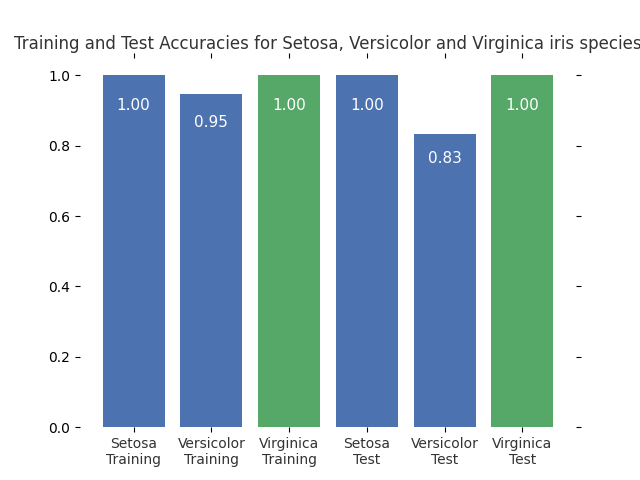

In [23]:
# works with unscaled version of the test / training sets
accuracy_plot_iris(scores_iris)

---
 # REAL WORLD DATASET: BREAST CANCER 
    
---

In [24]:
from sklearn.datasets import load_breast_cancer
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
print ("Type of data structure: ", type(cancer))
print ("Keys: ", cancer.keys())
print ("Feature names: ", cancer["feature_names"])

# convert to dataframe
cancerdf = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancerdf['target'] = pd.Series(cancer.target)
counts = cancerdf.target.value_counts(ascending=True)
counts.index = "malignant benign".split()
print ("Distribution of labelled samples: ")
print(counts)
print ("-------------------------------------------")
print (cancerdf.head(5))

Type of data structure:  <class 'sklearn.utils.Bunch'>
Keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Feature names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Distribution of labelled samples: 
malignant    212
benign       357
Name: target, dtype: int64
-------------------------------------------
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.8

    BREAST CANCER 2 dimensions

    BREAST CANCER 2:10 dimensions

<IPython.core.display.Javascript object>


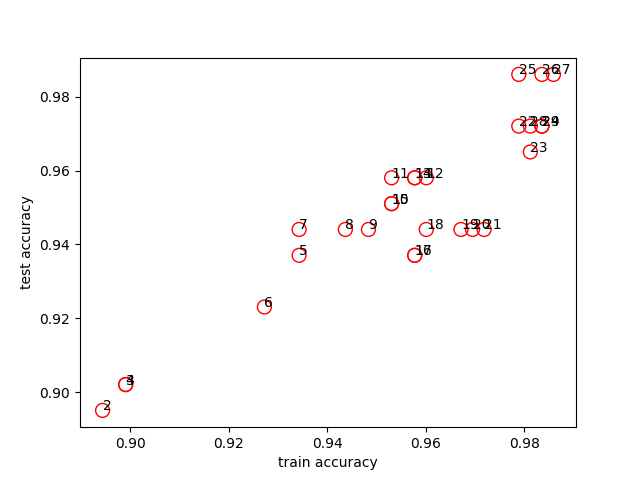

---------------------
[0.8943661971830986, 0.8990610328638498, 0.8990610328638498, 0.9342723004694836, 0.9272300469483568, 0.9342723004694836, 0.9436619718309859, 0.9483568075117371, 0.9530516431924883, 0.9530516431924883, 0.960093896713615, 0.9577464788732394, 0.9577464788732394, 0.9530516431924883, 0.9577464788732394, 0.9577464788732394, 0.960093896713615, 0.9671361502347418, 0.9694835680751174, 0.971830985915493, 0.9788732394366197, 0.9812206572769953, 0.9835680751173709, 0.9788732394366197, 0.9835680751173709, 0.9859154929577465, 0.9812206572769953, 0.9835680751173709]
[0.8951048951048951, 0.9020979020979021, 0.9020979020979021, 0.9370629370629371, 0.9230769230769231, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.951048951048951, 0.958041958041958, 0.958041958041958, 0.958041958041958, 0.958041958041958, 0.951048951048951, 0.9370629370629371, 0.9370629370629371, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.972027972027972, 0.9650

In [25]:
n_dimensions_range = range(2,30)

train_scores = []
test_scores = []

for n_dimensions in n_dimensions_range:
    
    X_train_BC, X_test_BC, y_train_BC, y_test_BC = train_test_split(X_cancer[:,:n_dimensions], 
                                                                    y_cancer, 
                                                                    random_state = 0)
    scaler_BC = MinMaxScaler()
    X_train_scaled_BC = scaler_BC.fit_transform(X_train_BC)
    X_test_scaled_BC = scaler_BC.transform(X_test_BC)
    
    clf = SVC(kernel = 'rbf', 
          gamma = this_gamma,
          C = this_C).fit(X_train_scaled_BC, y_train_BC)
   
    train_scores.append(clf.score(X_train_scaled_BC, y_train_BC))
    test_scores.append(clf.score(X_test_scaled_BC, y_test_BC))

plt.figure()
#plt.xlabel('k')
plt.xlabel('train accuracy')
plt.ylabel('test accuracy')
#plt.scatter(k_range, scores)
plt.scatter(train_scores, test_scores, 
            s= 100, 
            facecolors='none', 
            edgecolors='r')
#plt.xticks([0,.2,.4,.6,.8, 1]);
#plt.yticks([0,.2,.4,.6,.8, 1]);

for i, label in enumerate(n_dimensions_range):
    plt.annotate(label, (train_scores[i], test_scores[i]))

print ("---------------------")
print (train_scores)
print(test_scores)

<IPython.core.display.Javascript object>


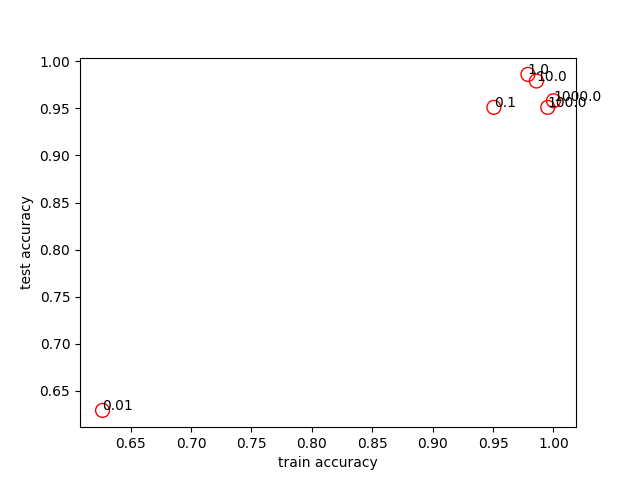

---------------------
[0.6267605633802817, 0.9507042253521126, 0.9788732394366197, 0.9859154929577465, 0.9953051643192489, 1.0]
[0.6293706293706294, 0.951048951048951, 0.986013986013986, 0.9790209790209791, 0.951048951048951, 0.958041958041958]


In [26]:
C_range = np.array([0.01, 0.1, 1, 10, 100, 1000])

X_train_BC, X_test_BC, y_train_BC, y_test_BC = train_test_split(X_cancer[:,:25], 
                                                                    y_cancer, 
                                                                    random_state = 0)
scaler_BC = MinMaxScaler()
X_train_scaled_BC = scaler_BC.fit_transform(X_train_BC)
X_test_scaled_BC = scaler_BC.transform(X_test_BC)

train_scores = []
test_scores = []

for crt_C in C_range:
    clf = SVC(C=crt_C, 
             kernel = "rbf",
             gamma = this_gamma).fit(X_train_scaled_BC, y_train_BC)
   
    train_scores.append(clf.score(X_train_scaled_BC, y_train_BC))
    test_scores.append(clf.score(X_test_scaled_BC, y_test_BC))

plt.figure()
#plt.xlabel('k')
plt.xlabel('train accuracy')
plt.ylabel('test accuracy')
#plt.scatter(k_range, scores)
plt.scatter(train_scores, test_scores, 
            s= 100, 
            facecolors='none', 
            edgecolors='r')
#plt.xticks([0,.2,.4,.6,.8, 1]);
#plt.yticks([0,.2,.4,.6,.8, 1]);

for i, label in enumerate(C_range):
    plt.annotate(label, (train_scores[i], test_scores[i]))

print ("---------------------")
print (train_scores)
print(test_scores)

---
EVALUATION: train-test accuracy as a function of .... Crossvalidation
---
    cross-validation is used to evaluate the model and not learn or tune a new model! 
    To do model tuning ==> tune the models parameters via e.g. "Grid Search"

In [27]:
clf = SVC(C= this_C, 
             kernel = "rbf",
             gamma = this_gamma)

cv_scores = cross_val_score(clf, 
                            X_cancer, y_cancer, 
                            cv= 5)

print ( "5 - fold")
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score: {:.3f}'
     .format(np.mean(cv_scores)))

5 - fold
Cross-validation scores: [0.62280702 0.62280702 0.63157895 0.63157895 0.62831858]
Mean cross-validation score: 0.627


In [28]:
param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(),  
                                             X_cancer, y_cancer, 
                                             param_name='gamma',
                                             param_range=param_range, cv=3)

<IPython.core.display.Javascript object>


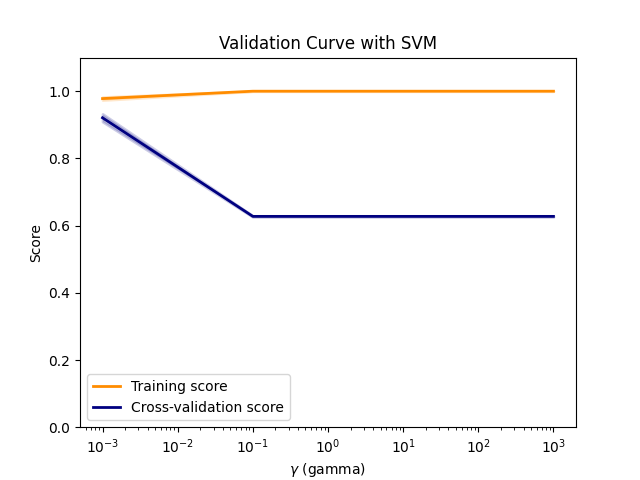

In [29]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

In [30]:
def plot_validation_curve(param_range,
                          train_scores, 
                          test_scores, 
                          title, label_x, label_y):
    # This code based on scikit-learn validation_plot example
    #  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
    plt.figure()

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.ylim(0.0, 1.1)
    lw = 2

    plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

    plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

    plt.legend(loc='best')
    plt.show()

<IPython.core.display.Javascript object>


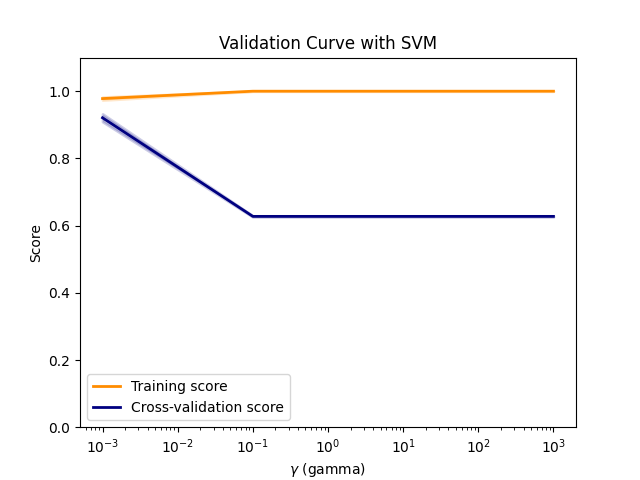

In [31]:
title = 'Validation Curve with SVM'
label_x = '$\gamma$ (gamma)'
label_y = "Score"

plot_validation_curve(param_range,
                          train_scores, 
                          test_scores, 
                          title, label_x, label_y)

In [32]:
np.logspace(-3, 3, 4)

array([1.e-03, 1.e-01, 1.e+01, 1.e+03])

<IPython.core.display.Javascript object>


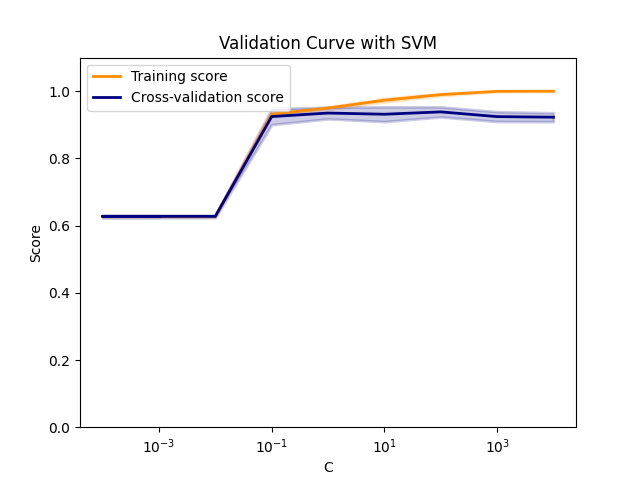

In [33]:
#clf = SVC(C= this_C, kernel = "rbf", gamma = this_gamma)
#param_range = np.logspace(-3, 3, 4)
param_range = np.array([0.001, 0.0001, 0.01, 0.1, 1, 10, 100, 1000, 10000])


train_scores, test_scores = validation_curve( #SVC(), 
                                            SVC(kernel = "rbf", gamma = 0.0001),
                                            X_cancer, y_cancer, 
                                            param_name='C',
                                            param_range=param_range, cv=5)


title = 'Validation Curve with SVM'
label_x = 'C'
label_y = "Score"

plot_validation_curve(param_range,
                          train_scores, 
                          test_scores, 
                          title, label_x, label_y)

In [34]:
clf = SVC(C= 0.1, kernel = "rbf", gamma =  0.0001).fit(X_train_BC, y_train_BC)

predictions = clf.predict(X_test_BC)
confusion = confusion_matrix(y_test_BC, predictions)

print('SVC \n', confusion)

SVC 
 [[49  4]
 [ 5 85]]


    True negative and false negative are in the first column, and true positive and false positive are in the second column.

    The successful predictions of the classifier are on the diagonal where the true class matches the predicted class. The cells off the diagonal represent errors of different types.

In [35]:
# Combined report with all  metrics
print(classification_report(y_test_BC, predictions, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.91      0.92      0.92        53
      benign       0.96      0.94      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



 EVAL: DECISION FUNCTION
 ---
    
    When given a set of test points, the decision function method provides for each one a classifier score value that indicates how confidently classifier predicts the positive class. So there will be large magnitude positive scores for those points, or it predicts a negative class, there'll be large magnitude negative scores for negative points.
    
    not all models provide useful probability estimates of this type. For example, a model that was over-fit to a trending set. Might provide overly optimistic high probabilities that were in fact not accurate.

In [36]:
clf = SVC(C= 0.1, kernel = "rbf", gamma =  0.0001, 
          probability = True).fit(X_train_BC, y_train_BC)


# predicted probability of class membership
y_proba_clf = clf.predict_proba(X_test_BC)
y_proba_list = list(zip(y_test_BC[0:20], y_proba_clf[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 0.061731106755356355),
 (1, 0.9692970892936913),
 (1, 0.9718650436713561),
 (1, 0.7259248395031495),
 (1, 0.9124723066755087),
 (1, 0.9726693318839412),
 (1, 0.9559197269537406),
 (1, 0.9709794692994036),
 (1, 0.7227054041932833),
 (1, 0.9685149216715611),
 (1, 0.835798530010788),
 (1, 0.8926552575327147),
 (1, 0.9549748765139482),
 (1, 0.05972304898271599),
 (1, 0.8750652341386185),
 (0, 0.03453090469334887),
 (1, 0.9514886009528264),
 (0, 0.038474139217131186),
 (0, 0.05315570511627541),
 (0, 0.05172454876743641)]

In [37]:
y_scores_clf = clf.decision_function(X_test_BC)
y_score_list = list(zip(y_test_BC[0:20], y_scores_clf[0:20]))
# show the decision_function scores for first 20 instances
y_score_list_df = pd.DataFrame(y_score_list)
y_score_list_df.columns = ["target", "decision function score"]
y_score_list_df

,target,decision function score
0,0,-0.805317
1,1,1.029643
2,1,1.056417
3,1,0.293157
4,1,0.699930
5,1,1.065292
6,1,0.917880
7,1,1.046926
8,1,0.288365
9,1,1.021917


   EVAL: LOOK AT ALL POSSIBLE DECISION THRESHOLDS ==> impact on precision-recall 
   ---
       we can use these decision scores or prediction probabilities for getting more complete evaluation picture of a classifiers performance. For a particular application, we might pick a specific decision threshold depending on whether we want the classifier to be more or less conservative about making false-positive or false-negative errors. It might not be entirely clear when developing a new model, what the right decision threshold would be, and how that choice will affect evaluation metrics like precision and recall. So instead, what we'll do is, look at how classifier performs for all possible decision thresholds. 

<IPython.core.display.Javascript object>


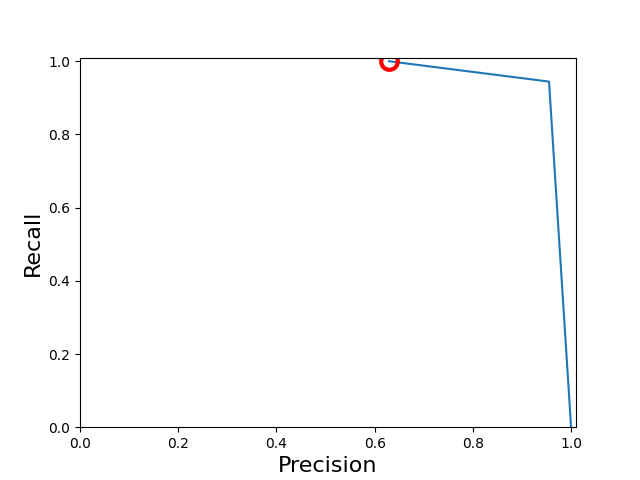

In [38]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test_BC, predictions)
closest_zero = np.argmin(np.abs(thresholds)) # decision threshold is 0
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
#plt.axes().set_aspect('equal')
plt.show()

    the optimal point would be up here in the top right. 
    in general, with precision recall curves, the closer in some sense, the curve is to the top right corner, the more preferable it is, the more beneficial the tradeoff it gives between precision and recall.
    
     as the precision of the classifier goes up, the recall tends to go down.

<IPython.core.display.Javascript object>


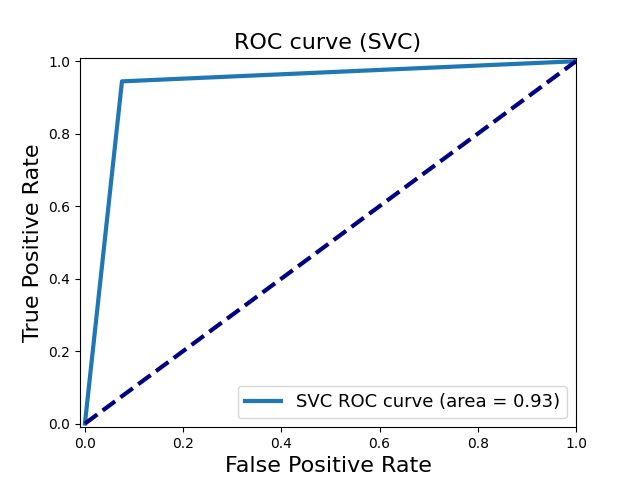

In [39]:
from sklearn.metrics import roc_curve, auc

#X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
#y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test_BC, predictions)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='SVC ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (SVC)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
#plt.axes().set_aspect('equal')
plt.show()

    It's basically like flipping a coin. If you have two classes with equal numbers of positive and negative incidences, then flipping a coin will get you randomly equal numbers of false positives and true positives for a large virus data sets. 
    So the dotted line here is used as a base line. So bad classifier will have performance that is random or maybe even worse than random or be slightly better than random. Reasonably good classifier will give an ROC curve that is consistently better than random across all decision threshold choices.an excellent classifier would be one like I've shown here, which is way up into the left.
    the shape of the curve can be important as well, the steepness of the curve, we want classifiers that maximize the true positive rate while minimizing the false positive rate.
    
    area under the curve, AUC. That's the single number that measures this total area underneath the ROC curve as a way to summarize a classifier's performance. So, an AUC of zero represents a very bad classifier, and an AUC of one will represent an optimal classifier.

<IPython.core.display.Javascript object>


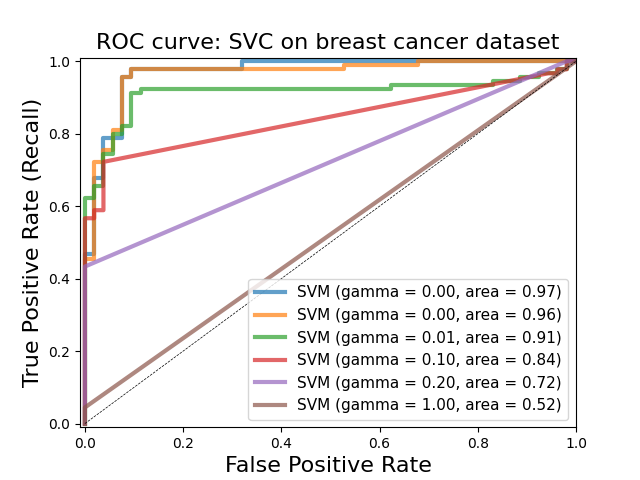

gamma = 0.00  accuracy = 0.94   AUC = 0.97
gamma = 0.00  accuracy = 0.63   AUC = 0.96
gamma = 0.01  accuracy = 0.63   AUC = 0.91
gamma = 0.10  accuracy = 0.63   AUC = 0.84
gamma = 0.20  accuracy = 0.63   AUC = 0.72
gamma = 1.00  accuracy = 0.63   AUC = 0.52


In [40]:
from matplotlib import cm

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.0001, 0.001, 0.01, 0.1, 0.20, 1]:
    svm = SVC(C= 0.1, gamma=g).fit(X_train_BC, y_train_BC)
    y_score_svm = svm.decision_function(X_test_BC)
    fpr_svm, tpr_svm, _ = roc_curve(y_test_BC, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test_BC, y_test_BC)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: SVC on breast cancer dataset', fontsize=16)
#plt.axes().set_aspect('equal')

plt.show()